In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import math

In [2]:
df = pd.read_csv('imdbhorrordata5kratingsv3.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Title,Year,Rating,Link,Budget,Gross,Net,Date,Month
0,0,1,Paranormal Activity,2007,6.3,/title/tt1179904/,15000.0,193355800.0,193340800.0,2009-10-16,10.0
1,1,10,Trick 'r Treat,2007,6.7,/title/tt0862856/,12000000.0,NaN,NaN,2015-11-27,11.0
2,2,16,The Oxford Murders,2008,6.1,/title/tt0488604/,10000000.0,17646627.0,7646627.0,2010-07-02,7.0
3,3,33,From Within,2008,5.6,/title/tt1063056/,NaN,228014.0,NaN,2009-06-03,6.0
4,4,42,Babysitter Wanted,2008,5.4,/title/tt0819755/,NaN,NaN,NaN,2009-02-06,2.0
...,...,...,...,...,...,...,...,...,...,...,...
811,811,910,Eli (I),2019,5.8,/title/tt5294518/,14113729.0,NaN,NaN,2019-10-18,10.0
812,812,911,Countdown (III),2019,5.4,/title/tt10039344/,6500000.0,48021766.0,41521766.0,2019-10-25,10.0
813,813,912,Rattlesnake,2019,4.6,/title/tt9257484/,NaN,NaN,NaN,2019-10-25,10.0
814,814,915,Doctor Sleep,2019,7.3,/title/tt5606664/,45000000.0,72381712.0,27381712.0,2019-11-08,11.0


In [4]:
df['Month']
# df['Month'] = pd.to_numeric(df['Date'][4:6].astype(float))

0      10.0
1      11.0
2       7.0
3       6.0
4       2.0
       ... 
811    10.0
812    10.0
813    10.0
814    11.0
815    12.0
Name: Month, Length: 816, dtype: float64

<BarContainer object of 12 artists>

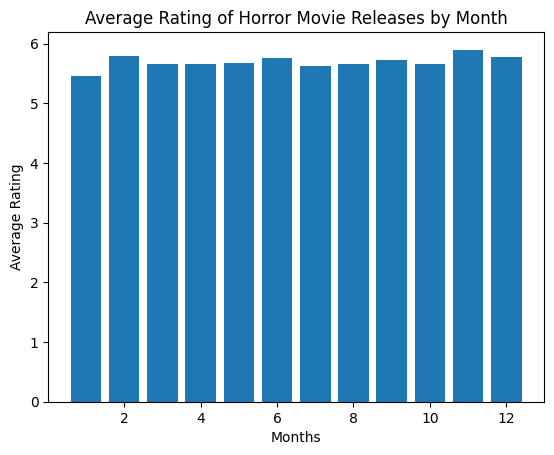

In [5]:
RatingTracker = {
  1 : [0, 0, 0], 2 : [0, 0, 0], 3 : [0, 0, 0], 4 : [0, 0, 0], 5 : [0, 0, 0], 6 : [0, 0, 0], 
  7 : [0, 0, 0], 8 : [0, 0, 0], 9 : [0, 0, 0], 10 : [0, 0, 0], 11 : [0, 0, 0], 12 : [0, 0, 0]
}
# [tracks total, tracks count, tracks mean]

RatingList = df['Rating'].tolist()
MonthList = df['Month'].tolist()

for i in range(len(RatingList)):
  if MonthList[i] in RatingTracker:
    RatingTracker[MonthList[i]][0] += RatingList[i]
    RatingTracker[MonthList[i]][1] += 1
avg = []
freq = []
# print(RatingTracker)
# loops through 1-12
for i in RatingTracker:
  RatingTracker[i][2] = (RatingTracker[i][0])/(RatingTracker[i][1])
  avg.append(RatingTracker[i][2])
  freq.append(RatingTracker[i][1])
    # print(RatingTracker[i][2])

# print(RatingTracker)

months = list(RatingTracker.keys())
plt.xlabel("Months")
plt.ylabel("Average Rating")
plt.title("Average Rating of Horror Movie Releases by Month")
plt.bar(months, avg)



<BarContainer object of 12 artists>

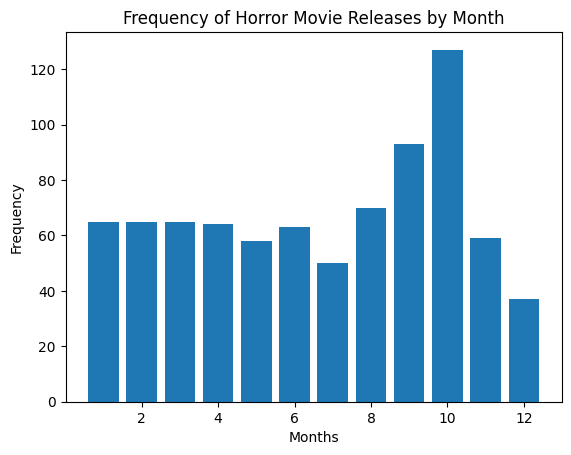

In [6]:
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Frequency of Horror Movie Releases by Month")
plt.bar(months, freq)

<BarContainer object of 2 artists>

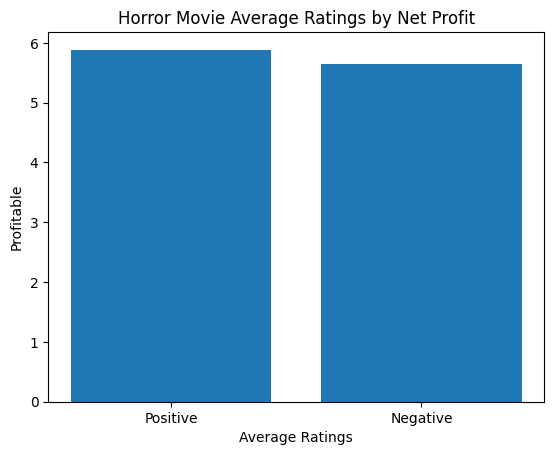

In [7]:
RevenueTracker = {
    "Positive" : [0, 0, 0],
    "Negative" : [0, 0, 0]
}
# ratings total, ratings count, ratings mean

RevenueList = df['Net'].tolist()
for i in range(len(RevenueList)):
    # print(i)
    if not math.isnan(RevenueList[i]):
        if RevenueList[i] > 0:
                RevenueTracker["Positive"][0] += RatingList[i]
                RevenueTracker["Positive"][1] += 1
        if RevenueList[i] < 0:
                RevenueTracker["Negative"][0] += RatingList[i]
                RevenueTracker["Negative"][1] += 1
                
        # print(RevenueList[i])
AvgRatingByNet = []
PosNeg = list(RevenueTracker.keys())
for i in RevenueTracker:
    AvgRatingByNet.append(RevenueTracker[i][0]/RevenueTracker[i][1])


plt.xlabel("Average Ratings")
plt.ylabel("Profitable")
plt.title("Horror Movie Average Ratings by Net Profit")
plt.bar(PosNeg, AvgRatingByNet)

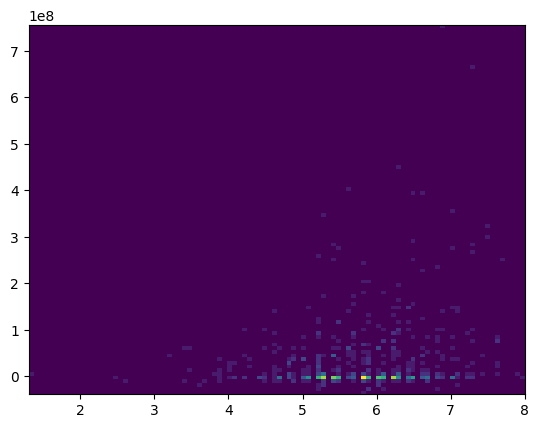

In [16]:
df2 = pd.read_csv('imdbhorrordata5kratingsv3_allnet.csv')

plt.hist2d(df2['Rating'], df2['Net'], bins = [100, 100], )
plt.show()

# df['Rating']